In [1]:
import numpy as np
import numpy.matlib as npm
import matplotlib.pyplot as plt

In [2]:
T=1; N= 500; dt= T/N

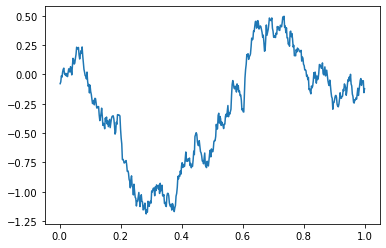

In [3]:
np.random.seed(100)
increments = np.sqrt(dt) * np.random.normal(0,1,int(N));
#increments = np.sqrt(dt) * np.random.default_rng(seed =100);

t = np.linspace(dt,1,N)
B = np.cumsum(increments)
plt.plot(t,B);

In [4]:
rng = np.random.RandomState(seed=100)
M =1000
t= np.linspace(dt,1,N)
t0 = np.append(0,t)
dW1 = np.sqrt(dt)*rng.normal(size=(M,N))
W = np.cumsum(dW1, axis=1)
U = np.exp(npm.repmat(t, M, 1) + 0.5*W)
Umean = np.mean(U, axis=0)
Umean0 = np.append(1,Umean)
Umean1 = np.append(np.ones((5,1)),U[0:5,:],axis=1)

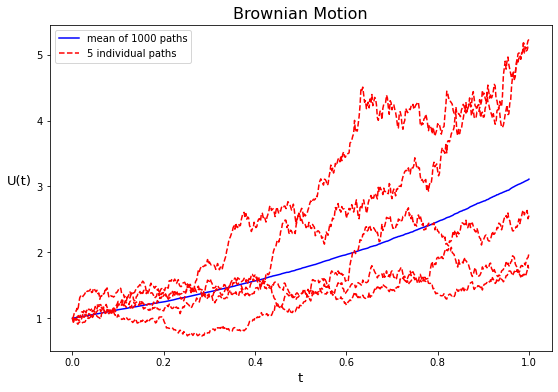

In [5]:
plt.figure(figsize=(9,6))
plt.plot(t0, Umean0, 'b-')
plt.plot(t0, Umean1.T, 'r--')
plt.xlabel('t', fontsize=13)
plt.title('Brownian Motion', fontsize=16)
plt.ylabel('U(t)', rotation=0, horizontalalignment='right', fontsize=13)
plt.legend(labels=['mean of 1000 paths', '5 individual paths']);

Euler Murayama

In [6]:
# problem parameter
lambda_ = 2; mu = 1; Xzero = 1
T = 1; N= 2**8; dt = 1/N

In [7]:
rng = np.random.RandomState(seed=100)
# Brownian Increments
dW = np.sqrt(dt) * rng.normal(size=N)
W = np.cumsum(dW) # discretised Brownian Path
t = np.linspace(dt, T, N)
t0 = np.append(0, t)
Xtrue = Xzero * np.exp((lambda_ - 0.5 * mu**2) * t + mu * W)
X0 = np.append(Xzero, Xtrue)

In [8]:
R = 4; Dt = R*dt
L = int(N/R); Xem = np.zeros(L)

In [9]:
Xtemp = Xzero
for j in range(L):
    start = R * (j+1-1)
    end = R*(j+1)
    Winc = np.sum(dW[start:end])
    Xtemp = Xtemp + Dt * lambda_ * Xtemp + mu * Xtemp * Winc
    Xem[j] = Xtemp

In [10]:
X1em = np.append(Xzero, Xem)
t1 = np.append(0, np.linspace(Dt, T, L))

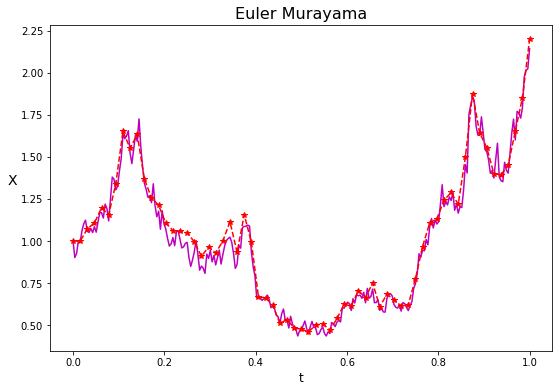

In [11]:
plt.figure(figsize=(9,6))
plt.plot(t0, X0, 'm-')
plt.plot(t1, X1em, 'r--*')
plt.xlabel('t', fontsize=12)
plt.title('Euler Murayama', fontsize=16)
plt.ylabel('X', fontsize=14, rotation=0, horizontalalignment='right');

Strong Convergence

em.strong

In [12]:
# problem parameters
lambda_ = 2; mu = 1; Xzero = 1
T = 1; N = 2**9; dt= T/N
M= 1000 # number of paths sampled

In [13]:
rng = np.random.RandomState(100)
# problem parameters
lambda_ = 2; mu = 1; Xzero = 1
T = 1; N = 2**9; dt= T/N
M= 1000 # number of paths sampled
Xerr = np.zeros((M,5)) # preallocate array
for s in range(M): # sample over discrete Brownian paths
    dW = np.sqrt(dt) * rng.normal(size=N) # sample over discrete Brownian path
    W = np.cumsum(dW) # discrete Brownian path
    Xtrue = Xzero * np.exp((lambda_ - 0.5 * mu**2) + mu * W[-1])
    for p in range(5):
        R = 2**(p+1-1)
        Dt = R * dt
        L = int(N/R) # L Euler steps of size Dt = R*dt
        Xtemp = Xzero
        for j in range(L):
            start = R * (j+1-1)
            end = R*(j+1)
            Winc = np.sum(dW[start:end])
            Xtemp = Xtemp + Dt*lambda_*Xtemp + mu*Xtemp*Winc
        Xerr[s,p] = np.abs(Xtemp - Xtrue) # store the error at t=1

In [14]:
Dtvals = dt*(2.**np.arange(0,5))

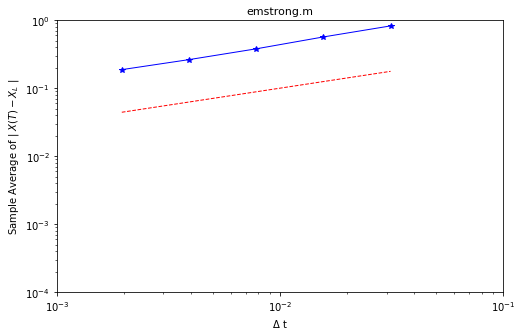

In [15]:
plt.figure(figsize=(8,5))
plt.plot(Dtvals, np.mean(Xerr, axis=0), 'b-*', lw=1)
plt.plot(Dtvals, Dtvals**0.5, 'r--', lw=1)
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.yscale('log')
plt.xscale('log')
plt.title('emstrong.m', fontsize=11)
plt.xlabel('$\Delta$ t')
plt.ylabel('Sample Average of | $X(T) - X_L$ |');

In [16]:
# List of squares fit error = C * Dt^q
A = np.c_[np.ones(5), np.log(Dtvals)] # stack by columns
rhs = (np.log(np.mean(Xerr, axis=0))).reshape(-1,1) # reshape to a column vector
sol = np.linalg.lstsq(A, rhs, rcond=None)[0]
q = sol[1]
resid = np.linalg.norm(A@sol - rhs)

In [17]:
resid

0.03442424920481465

em-weak

In [18]:
lambda_ = 2; mu = 0.1; Xzero = 1; T = 1 # problem parameters
M = 50000 # number of paths sampled

In [19]:
rng = np.random.RandomState(100)
Xem = np.zeros(5) # preallocate arrays

for p in range(5): # take various Euler timesteps
    Dt = 2**(p+1-10); L = int(T/Dt) #L Euler steps of size Dt
    Xtemp = Xzero * np.ones(M)
    for j in range(L):
        Winc = np.sqrt(Dt)*rng.normal(size=M) # em.weak1
        Xtemp = Xtemp + Dt*lambda_*Xtemp + mu*Xtemp*Winc
    Xem[p] = np.mean(Xtemp)
Xerr = np.abs(Xem - np.exp(lambda_))

In [20]:
Dtvals = 2.**(np.arange(1,6)-10)

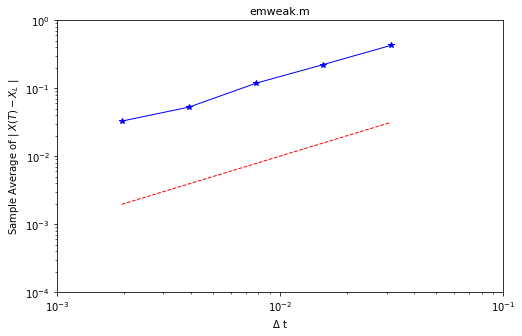

In [21]:
plt.figure(figsize=(8,5))
plt.plot(Dtvals, Xerr, 'b-*', lw=1)
plt.plot(Dtvals, Dtvals, 'r--', lw=1)
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.yscale('log')
plt.xscale('log')
plt.title('emweak.m', fontsize=11)
plt.xlabel('$\Delta$ t')
plt.ylabel('Sample Average of | $X(T) - X_L$ |');

em.weak2

In [22]:
rng = np.random.RandomState(100)
Xem = np.zeros(5) # preallocate arrays

for p in range(5): # take various Euler timesteps
    Dt = 2**(p+1-10); L = int(T/Dt) #L Euler steps of size Dt
    Xtemp = Xzero * np.ones(M)
    for j in range(L):
        Winc = np.sqrt(Dt)*np.sign(rng.normal(size=M)) # em.weak2
        Xtemp = Xtemp + Dt*lambda_*Xtemp + mu*Xtemp*Winc
    Xem[p] = np.mean(Xtemp)
Xerr = np.abs(Xem - np.exp(lambda_))

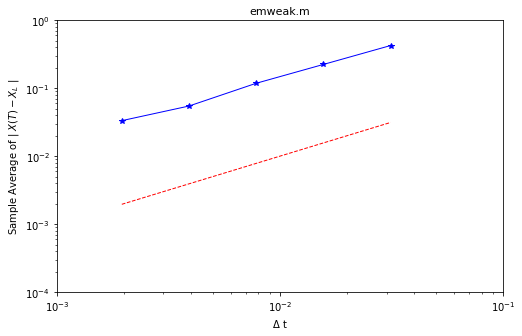

In [23]:
plt.figure(figsize=(8,5))
plt.plot(Dtvals, Xerr, 'b-*', lw=1)
plt.plot(Dtvals, Dtvals, 'r--', lw=1)
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.yscale('log')
plt.xscale('log')
plt.title('emweak.m', fontsize=11)
plt.xlabel('$\Delta$ t')
plt.ylabel('Sample Average of | $X(T) - X_L$ |');

mil.strong

In [24]:
r = 2; K = 1; beta = 0.25; Xzero = 0.5 # problem parameters
T = 1; N = 2**11; dt = T/N
M = 500 # number of paths sampled
R = np.array([1, 16, 32, 64, 128]) # Milstein stepsizes are R*dt

In [25]:
rng = np.random.RandomState(100)
dW = np.sqrt(dt) * rng.normal(size=(M,N)) # Brownian increments
Xmil = np.zeros((M,5)) # preallocate array

for p in range(5):
    Dt = R[p] * dt; L = int(N/R[p]) # L timesteps of size Dt= R dt
    Xtemp = Xzero*np.ones(M)
    for j in range(L):
        start = R[p] * (j+1-1)
        end = R[p] * (j+1)
        Winc = np.sum(dW[:, start:end], axis=1)
        Xtemp = Xtemp + Dt*r*Xtemp * (K-Xtemp) + beta*Xtemp*Winc + 0.5*beta**2*Xtemp*(Winc**2 - Dt)
    Xmil[:, p] = Xtemp # store Milstein solution at t=1

In [26]:
Xref = Xmil[:,0].reshape(-1,1) # Reference solution and reshaping to column vector of shape (M,1)
Xerr = np.abs(Xmil[:,1:] - npm.repmat(Xref,1,4)) # Error in each path
np.mean(Xerr) # Mean pathwise erorrs
Dtvals = dt*R[1:] # Milstein timesteps used

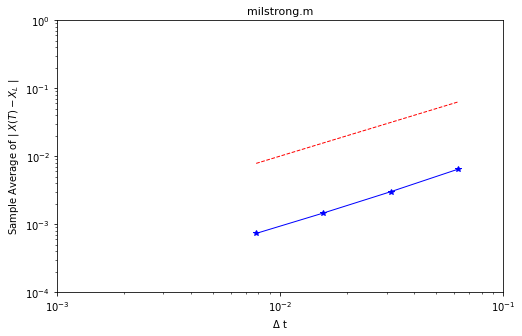

In [27]:
plt.figure(figsize=(8,5))
plt.plot(Dtvals, np.mean(Xerr,0), 'b-*', lw=1)
plt.plot(Dtvals, Dtvals, 'r--', lw=1)
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.yscale('log')
plt.xscale('log')
plt.title('milstrong.m', fontsize=11)
plt.xlabel('$\Delta$ t')
plt.ylabel('Sample Average of | $X(T) - X_L$ |');

In [28]:
# Least squares fit of error = C * Dt^q
A = np.c_[np.ones(4), np.log(Dtvals)]
rhs = (np.log(np.mean(Xerr,0))).reshape(-1,1)
sol = np.linalg.lstsq(A, rhs, rcond=None)[0]
q = sol[1]
resid = np.linalg.norm(A@sol - rhs)

In [29]:
resid

0.03545894802555375

Mean square and asymptotic stablity test for E-M

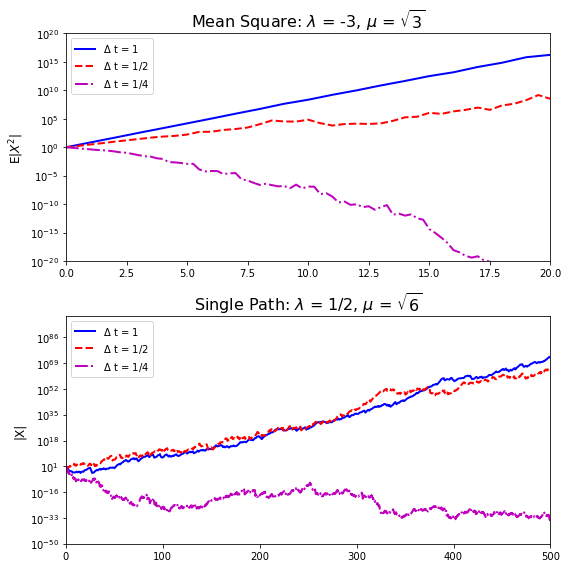

In [30]:
rng = np.random.RandomState(100)

plt.figure(figsize=(8,8))
plt.subplot(211)
T = 20; M = 50000; Xzero = 1
ltype = ['b-','r--','m-.'] # linetypes for plot
lambda_ = -3; mu= np.sqrt(3) # problem parameters
for k in range(3):
    Dt = 2**(1-(k+1))
    N = int(T/Dt)
    Xms = np.zeros(N); Xtemp = Xzero*np.ones(M)
    for j in range(N):
        Winc = np.sqrt(Dt) * rng.normal(size=M)
        Xtemp = Xtemp + Dt*lambda_*Xtemp + mu*Xtemp*Winc
        Xms[j] = np.mean(Xtemp**2) # mean square estimate
    t0 = np.arange(0, T+Dt, Dt)
    X0 = np.append(Xzero, Xms)
    plt.semilogy(t0, X0, ltype[k], lw=2)
plt.legend(['$\Delta$ t = 1', '$\Delta$ t = 1/2', '$\Delta$ t = 1/4'])
plt.title(r'Mean Square: $\lambda$ = -3, $\mu$ = $\sqrt{3}$', fontsize=16)
plt.ylabel('E|$X^2$|', fontsize=12)
plt.axis([0, T, 1e-20, 1e20])

plt.subplot(212)
T = 500; # Asymptotic: a single path
lambda_ = 0.5; mu = np.sqrt(6) # problem parameters
for k in range(3):
    Dt = 2**(1-(k+1))
    N = int(T/Dt)
    Xemabs = np.zeros(N); Xtemp = Xzero
    for j in range(N):
        Winc = np.sqrt(Dt) * rng.normal()
        Xtemp = Xtemp + Dt*lambda_*Xtemp + mu*Xtemp*Winc
        Xemabs[j] = np.abs(Xtemp)
    t0 = np.arange(0, T+Dt, Dt)
    X0 = np.append(Xzero, Xemabs)
    plt.semilogy(t0, X0, ltype[k], lw=2)
plt.legend(['$\Delta$ t = 1', '$\Delta$ t = 1/2', '$\Delta$ t = 1/4'])
plt.title(r'Single Path: $\lambda$ = 1/2, $\mu$ = $\sqrt{6}$', fontsize=16)
plt.ylabel('|X|', fontsize=12)
plt.axis([0, T, 1e-50, 1e100])
plt.tight_layout();

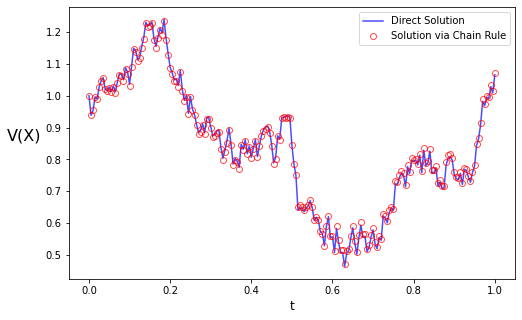

In [31]:
rng = np.random.RandomState(100)

alpha = 2; beta = 1; T = 1; N = 200; dt= T/N # problem parameters
Xzero = 1; Xzero2 = 1/np.sqrt(Xzero)

Dt = dt
Xem1 = np.zeros(N); Xem2 = np.zeros(N)
Xtemp1 = Xzero; Xtemp2 = Xzero2

for j in range(N):
    Winc = np.sqrt(dt) * rng.normal()
    f1 = (alpha - Xtemp1)
    g1 = beta * np.sqrt(np.abs(Xtemp1))
    Xtemp1 = Xtemp1 + Dt*f1 + Winc*g1
    Xem1[j] = Xtemp1
    f2 = (4*alpha-beta**2)/(8*Xtemp2) - Xtemp2/2
    g2 = beta/2
    Xtemp2 = Xtemp2 + Dt*f2 + Winc*g2
    Xem2[j] = Xtemp2
    
t0 = np.arange(0, T+Dt, Dt)
X0 = np.append(Xzero, np.abs(Xem1))
X1 = np.append(Xzero, np.abs(Xem2))

plt.figure(figsize=(8,5))
plt.plot(t0, np.sqrt(X0), 'b-', t0, X1, 'ro', markersize=6, alpha=0.7, fillstyle='none')
plt.legend(['Direct Solution', 'Solution via Chain Rule'])
plt.xlabel('t', fontsize=12)
plt.ylabel('V(X)', fontsize=16, rotation=0, horizontalalignment='right');

In [32]:
Xdiff = np.linalg.norm(np.sqrt(Xem1) - Xem2, ord=np.inf)

In [33]:
Xdiff

0.009203090847605289